## Финальный проект

**Задача:** предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

In [1]:
# Загрузка необходимых (разрешенных) библиотек

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка необходимых функций

# Standard Scale

def standard_scale(x):
    
    result = (x - x.mean()) / x.std()
    
    return result

# Log loss

def calc_logloss(y, y_pred):
    
    for i in range(y_pred.shape[0]):
        
        if y_pred[i]==1:
            
            y_pred[i]-=1e-4
            
        elif y_pred[i]==0:
            
            y_pred[i]+=1e-4
            
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    
    err = np.sum(err)
    
    return err

# Sigmoid

def sigmoid(z):
    
    result = 1 / (1 + np.exp(-0.9*z))
    
    return result

# Evaluation

def eval_model(X, y, iterations, alpha=1e-4):
    
    np.random.seed(42)
    
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations / 10) == 0:
            
            print(i, W, err)
            
    return W

# Pred

def calc_pred_proba(W, X):
    
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    
    return y_pred

---

### Загрузка и исследование данных train

In [3]:
# Загрузка данных из train.csv

df_train = pd.read_csv('data/train.csv', ',')

In [4]:
# Info

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [5]:
# Больше информации о таблице

df_train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


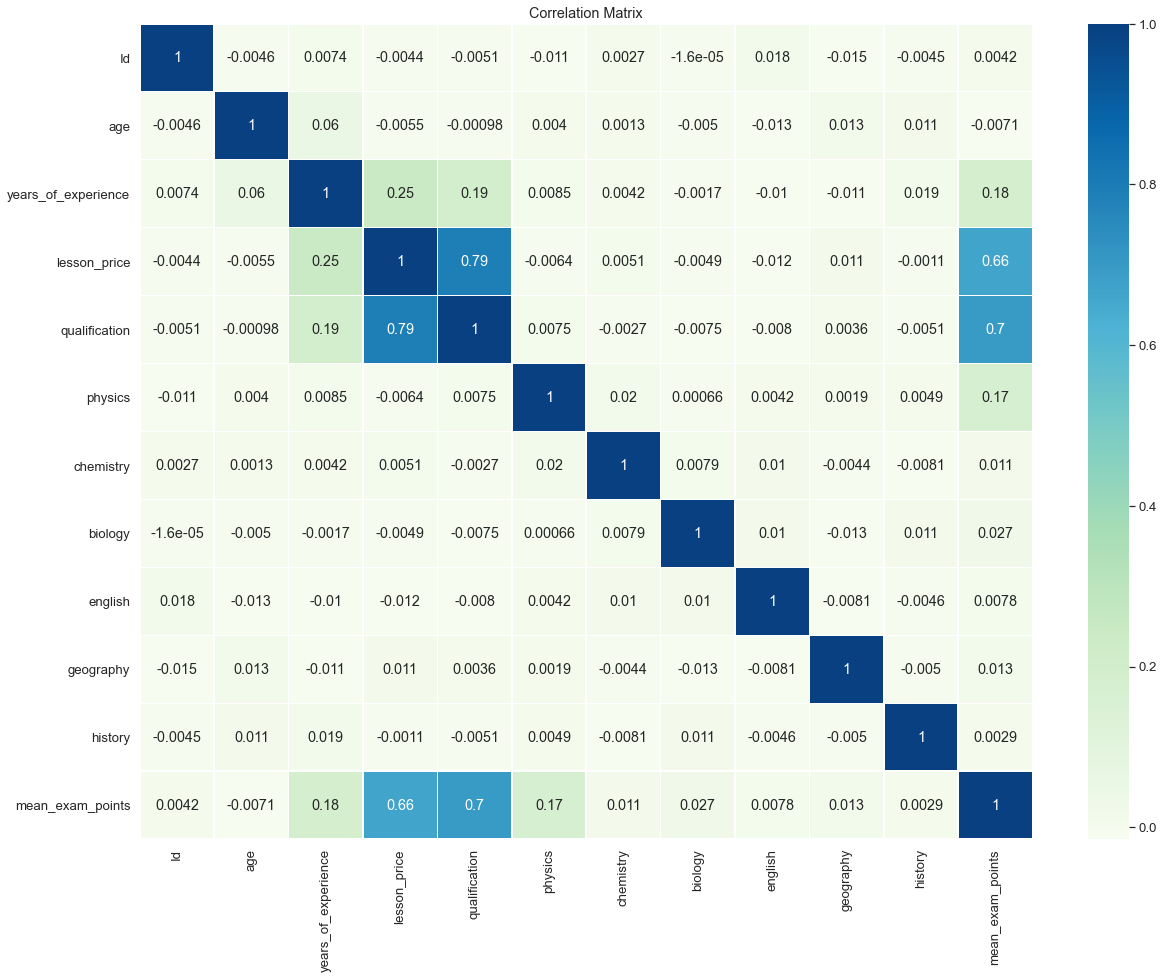

In [6]:
# Correlation Matrix через Seaborn

plt.figure(figsize = (20, 15))

sns.set(font_scale = 1.2)
sns.heatmap(df_train.corr(), annot = True, linewidths = .5, cmap = 'GnBu')

plt.title('Correlation Matrix')

# Вывод данных

plt.show()

---

In [7]:
# y std values для средних результатов экзамена

y = df_train['mean_exam_points'].values

y_std = y.std()
y = (y / y_std) / 100

# Проверка

print(y)

[0.04148294 0.05168367 0.03604256 ... 0.04216299 0.0380827  0.03536251]


In [8]:
# Поиск фичей и сохранение их в X

X = df_train.loc[:,['years_of_experience', 'lesson_price','qualification','physics']].values

# Проверка

print(X)

[[0.00e+00 1.40e+03 1.00e+00 1.00e+00]
 [4.00e+00 2.85e+03 3.00e+00 1.00e+00]
 [0.00e+00 1.20e+03 1.00e+00 0.00e+00]
 ...
 [1.00e+00 1.25e+03 1.00e+00 1.00e+00]
 [3.00e+00 1.10e+03 1.00e+00 0.00e+00]
 [0.00e+00 1.45e+03 1.00e+00 0.00e+00]]


In [9]:
# Преобразование для X

X_st = standard_scale(X)
X_st = X_st.T

# Проверка

print(X_st)

[[-0.54548565 -0.54036127 -0.54548565 ... -0.54420456 -0.54164237
  -0.54548565]
 [ 1.24804665  3.10563368  0.99182775 ...  1.05588248  0.8637183
   1.31210138]
 [-0.54420456 -0.54164237 -0.54420456 ... -0.54420456 -0.54420456
  -0.54420456]
 [-0.54420456 -0.54420456 -0.54548565 ... -0.54420456 -0.54548565
  -0.54548565]]


In [10]:
# Оценка модели

W = eval_model(X_st, y, iterations = 100000, alpha = 0.9999)

10000 [1.95499612 0.24578482 2.12915754 2.99610685] 0.17791333682886237
20000 [1.94375151 0.24578532 2.13843426 2.99806308] 0.17791331735760735
30000 [1.93252112 0.24578582 2.14770321 3.00001289] 0.17791329793034785
40000 [1.92130492 0.24578631 2.15696439 3.00195627] 0.17791327854697422
50000 [1.91010291 0.24578679 2.16621781 3.00389324] 0.17791325920737705
60000 [1.89891506 0.24578727 2.17546349 3.00582381] 0.1779132399114471
70000 [1.88774135 0.24578775 2.18470143 3.00774799] 0.17791322065907564
80000 [1.87658177 0.24578822 2.19393165 3.00966579] 0.17791320145015402
90000 [1.86543629 0.24578868 2.20315414 3.01157721] 0.1779131822845739
100000 [1.85430491 0.24578914 2.21236893 3.01348226] 0.17791316316222733


In [11]:
# Расчет вероятности используя значение W

y_pred = calc_pred_proba(W, X_st) * y_std * 100

# Проверка

print(y_pred)

[57.93634628 86.77253935 54.67983283 ... 55.73087814 53.5371888
 58.53450669]


---

### Загрузка и исследование данных test

In [12]:
df_test = pd.read_csv('data/test.csv', ',')

In [13]:
# Поиск фичей и сохранение их в X

X_test = df_test.loc[:,['years_of_experience', 'lesson_price','qualification','physics']].values

# Проверка

print(X_test)

[[3.00e+00 1.05e+03 1.00e+00 0.00e+00]
 [3.00e+00 1.85e+03 2.00e+00 0.00e+00]
 [1.00e+00 1.55e+03 1.00e+00 1.00e+00]
 ...
 [5.00e+00 1.10e+03 1.00e+00 0.00e+00]
 [0.00e+00 1.75e+03 2.00e+00 0.00e+00]
 [5.00e+00 2.00e+03 2.00e+00 1.00e+00]]


In [14]:
# Преобразование X через Standard scale и Transpose

X_test_st = X_test.copy()

X_test_st = (X_test_st - X.mean()) / X.std()

X_test_st = X_test_st.T

# Проверка

X_test_st

array([[-0.54164237, -0.54164237, -0.54420456, ..., -0.53908018,
        -0.54548565, -0.53908018],
       [ 0.79966358,  1.82453918,  1.44021083, ...,  0.8637183 ,
         1.69642973,  2.01670335],
       [-0.54420456, -0.54292346, -0.54420456, ..., -0.54420456,
        -0.54292346, -0.54292346],
       [-0.54548565, -0.54548565, -0.54420456, ..., -0.54548565,
        -0.54548565, -0.54420456]])

In [15]:
# Расчет вероятности

result_pred = calc_pred_proba(W, X_test_st) * y_std * 100

# Проверка

result_pred

array([52.8109918 , 65.80998622, 60.47283745, ..., 53.75821549,
       63.6594834 , 69.0428014 ])

In [16]:
df_test['mean_exam_points'] = result_pred

# Проверка

df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,52.810992
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,65.809986
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,60.472837
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,88.290965
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,93.980279


In [17]:
# Убираем ненужные столбцы

df_test.drop(['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics',
              'chemistry', 'biology', 'english','geography', 'history'], axis = 1, inplace = True)

# Проверка

df_test.head()

,Id,mean_exam_points
0,10000,52.810992
1,10001,65.809986
2,10002,60.472837
3,10003,88.290965
4,10004,93.980279


In [18]:
# Сохранение в качестве csv

df_test.to_csv('ivolgin.csv', index = False)